<a href="https://colab.research.google.com/github/Bharatgaur/RawProjects/blob/main/Introduction_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Statements**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

| Term | Definition |
|------|-----------|
| `import numpy as np` | Imports the NumPy library and assigns it the alias `np`, which is used for numerical computations. |
| `import pandas as pd` | Imports the Pandas library and assigns it the alias `pd`, which is used for data manipulation and analysis. |
| `from sklearn import preprocessing` | Imports the `preprocessing` module from `sklearn`, which provides utilities for feature scaling and normalization. |
| `from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer` | Imports `CountVectorizer` and `TfidfVectorizer` from `sklearn.feature_extraction.text`, which are used for text feature extraction. |
| `from sklearn.model_selection import train_test_split, KFold` | Imports `train_test_split` (for splitting datasets) and `KFold` (for K-Fold cross-validation) from `sklearn.model_selection`. |
| `from nltk.corpus import stopwords` | Imports the `stopwords` corpus from NLTK, which contains common words (e.g., "the", "is") that are often removed in text processing. |
| `from nltk.stem.snowball import SnowballStemmer` | Imports `SnowballStemmer` from NLTK, which is used for stemming words to their root forms. |
| `import matplotlib` | Imports the `matplotlib` library, which is used for data visualization. |
| `from matplotlib import pyplot as plt` | Imports the `pyplot` module from `matplotlib` and assigns it the alias `plt`, which is used for creating plots and charts. |
| `# import seaborn as sns` | A commented-out line that would import the `seaborn` library, which is used for statistical data visualization. |
| `%matplotlib inline` | A Jupyter Notebook magic command that ensures plots are displayed directly within the notebook. |
| `%config InlineBackend.figure_format = 'retina'` | A Jupyter Notebook configuration command that sets the figure format to `retina` for higher-resolution plots. |

Loading and inspecting data
Link to Dataset : - https://drive.google.com/file/d/1xMxfRyHrqLGRNH4JCvW61NX2AMcXeTLF/view

In [ ]:
import pandas as pd

# Google Drive file ID extracted from the link
file_id = "1xMxfRyHrqLGRNH4JCvW61NX2AMcXeTLF"

# Construct the downloadable URL
url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file directly into a DataFrame
data = pd.read_csv(url)

# Display the first few rows
print(data.head())


        id                                               text author
0  id26305  This process, however, afforded me no means of...    EAP
1  id17569  It never once occurred to me that the fumbling...    HPL
2  id11008  In his left hand was a gold snuff box, from wh...    EAP
3  id27763  How lovely is spring As we looked from Windsor...    MWS
4  id12958  Finding nothing else, not even gold, the Super...    HPL


In [ ]:
data.head(10)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [ ]:
data.iloc[0]['text']

# data.iloc[0]
# iloc is used for integer-based indexing in Pandas.
# 0 refers to the first row (Python uses zero-based indexing).
# data.iloc[0] returns the entire first row as a Pandas Series.
# ['text']
# Extracts the value from the column named "text" in the first row.

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [ ]:
data.shape

# data.shape .shape attribute in Pandas returns the dimensions of a DataFrame in the form of a tuple (rows, columns).

(19579, 3)

## **Bar chart of class proportion**

| **Code** | **Explanation** |
|----------|---------------|
| `EAP_len = data[data['author'] == 'EAP'].shape[0]` | Filters the DataFrame `data` to include only rows where the `author` column is `"EAP"`, then retrieves the number of such rows using `.shape[0]`. |
| `HPL_len = data[data['author'] == 'HPL'].shape[0]` | Filters `data` to include only rows where `author` is `"HPL"`, then extracts the count of these rows. |
| `MWS_len = data[data['author'] == 'MWS'].shape[0]` | Filters `data` for rows where `author` is `"MWS"`, then retrieves the count of these rows. |

### **Final Output**
Each variable (`EAP_len`, `HPL_len`, `MWS_len`) stores the count of rows corresponding to the respective authors in the dataset. 🚀

In [ ]:
# Extracting the number of examples of each class
EAP_len = data[data['author'] == 'EAP'].shape[0]
HPL_len = data[data['author'] == 'HPL'].shape[0]
MWS_len = data[data['author'] == 'MWS'].shape[0]
print(EAP_len)
print(HPL_len)
print(MWS_len)

7900
5635
6044


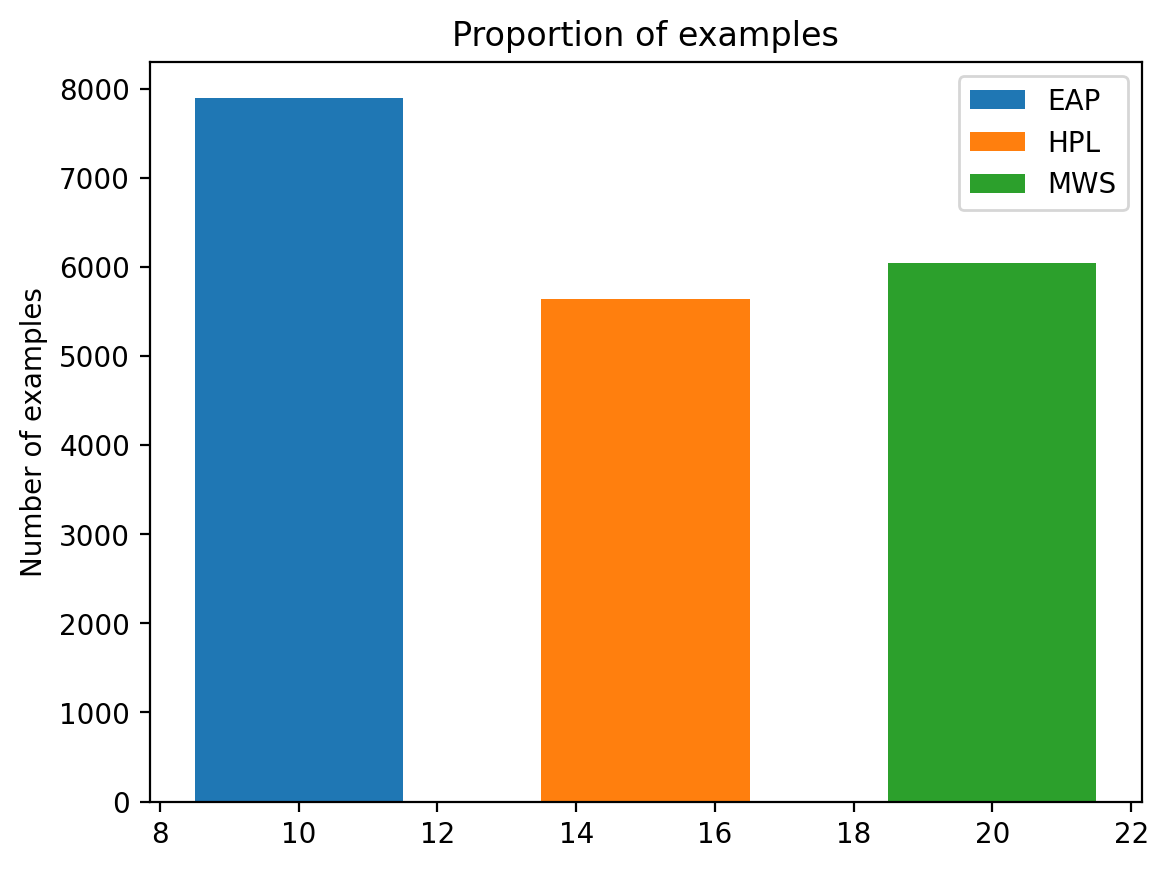

In [ ]:
# Bar Plot of the 3 Classes
plt.bar(10,EAP_len,3, label='EAP')
plt.bar(15, HPL_len,3, label='HPL')
plt.bar(20,MWS_len,3, label= 'MWS')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

## **Removing punctuations**

## **Funtion to remove punctuation**

In [ ]:
def remove_punctuation(text):
  ''' a function for removing punctuation'''
  import string
  # replacing the punctuation with no space,
  # which in effect deletes the punctuatin marks
  translator = str.maketrans('', '', string.punctuation)
  # retrun the text stripped of punctuations marks
  return text.translate(translator)

## **Apply the function to each examples**

In [ ]:
data['text'] = data['text'].apply(remove_punctuation)
data.head(10)

,id,text,author
0,id26305,This process however afforded me no means of a...,EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,In his left hand was a gold snuff box from whi...,EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,Finding nothing else not even gold the Superin...,HPL
5,id22965,A youth passed in solitude my best years spent...,MWS
6,id09674,The astronomer perhaps at this point took refu...,EAP
7,id13515,The surcingle hung in ribands from my body,EAP
8,id19322,I knew that you could not say to yourself ster...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


## **Removing stopwords**

**Extract the stop words**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Extracting the stopwords from nltk library
sw = stopwords.words('english')
# Displaying the stropwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
print("Number of stopwords:", len(sw))

Number of stopwords: 179


## **Function to remove stopwords**

In [ ]:
def stopwords(text):
  '''a function for removing the stopwords'''
  # Removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(text)

In [ ]:
data['text'] = data['text'].apply(stopwords)
data.head(10)

,id,text,author
0,id26305,process however afforded means ascertaining di...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand gold snuff box capered hill cutting ...,EAP
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL
5,id22965,youth passed solitude best years spent gentle ...,MWS
6,id09674,astronomer perhaps point took refuge suggestio...,EAP
7,id13515,surcingle hung ribands body,EAP
8,id19322,knew could say stereotomy without brought thin...,EAP
9,id00912,confess neither structure languages code gover...,MWS


In [ ]:
data['text'] = data['text'].apply(stopwords)
data.head(10)

,id,text,author
0,id26305,process however afforded means ascertaining di...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand gold snuff box capered hill cutting ...,EAP
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL
5,id22965,youth passed solitude best years spent gentle ...,MWS
6,id09674,astronomer perhaps point took refuge suggestio...,EAP
7,id13515,surcingle hung ribands body,EAP
8,id19322,knew could say stereotomy without brought thin...,EAP
9,id00912,confess neither structure languages code gover...,MWS


## **Top words before stemming**


Stemming is the process of reducing words to their root form by removing suffixes. It helps in text preprocessing for NLP by normalizing words to their base form.

## **Collect vocabulary count**

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# Fit the count vectorizer using the text data
count_vectorizer.fit(data['text'])
# Collect the vocabulary items used the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

### Store the vocab and counts in a pandas dataframe

In [ ]:
# List to store the vocab and counts
vocab = []
count = []
# iterate through each voacb and count append the value to designated list
for key, value in dictionary:
  vocab.append(key)
  count.append(value)
# Store the count in pandas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index= vocab)
# Sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending = False)

### **Bar plot of top words before stemming**

<Axes: >

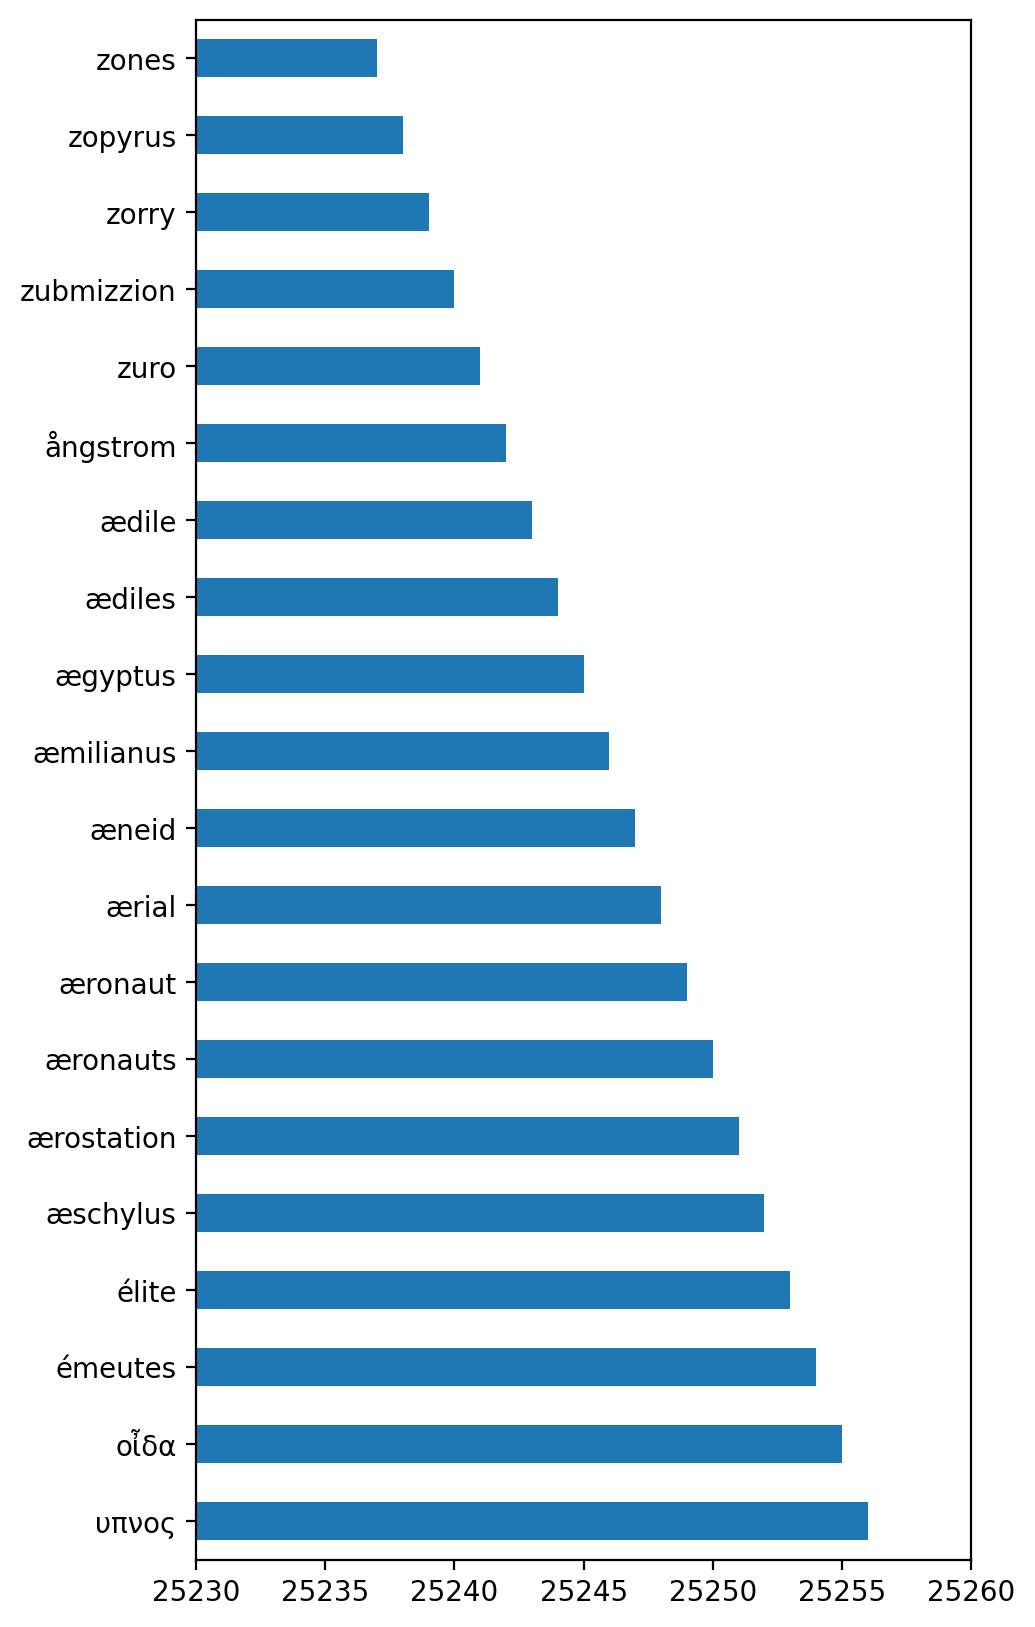

In [ ]:
top_vocab = vocab_bef_stem.head(20)
top_vocab.plot(kind = 'barh', figsize= (5,10), xlim = (25230, 25260))

##  **Stemming operations**

### Stemming operation bundles together words of same root. e.g. stem operation bundles "response" and "respond" into a common "respon"

**A funtion to carry out stemming operation**

In [ ]:
# Create an object of stemming function
stemmer = SnowballStemmer('english')
def stemming(text):
  ''' a function which stems each word in the given text'''
  text = [stemmer.stem(word) for word in text.split()]
  return " ".join(text)

**Apply the function to each examples**

In [ ]:
data['text'] = data['text'].apply(stemming)
data.head(10)

,id,text,author
0,id26305,process howev afford mean ascertain dimens dun...,EAP
1,id17569,never occur fumbl might mere mistak,HPL
2,id11008,left hand gold snuff box caper hill cut manner...,EAP
3,id27763,love spring look windsor terrac sixteen fertil...,MWS
4,id12958,find noth els even gold superintend abandon at...,HPL
5,id22965,youth pass solitud best year spent gentl femin...,MWS
6,id09674,astronom perhap point took refug suggest non l...,EAP
7,id13515,surcingl hung riband bodi,EAP
8,id19322,knew could say stereotomi without brought thin...,EAP
9,id00912,confess neither structur languag code govern p...,MWS


## **Top words after stemming operation**

**Collect vocabulary count**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the object of tfidf vectorizer with stop words removal
tfid_vectorizer = TfidfVectorizer(stop_words="english")

# fit the vectorizer using the text data
tfid_vectorizer.fit(data['text'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()


**Bar plot of top words after stemming**

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

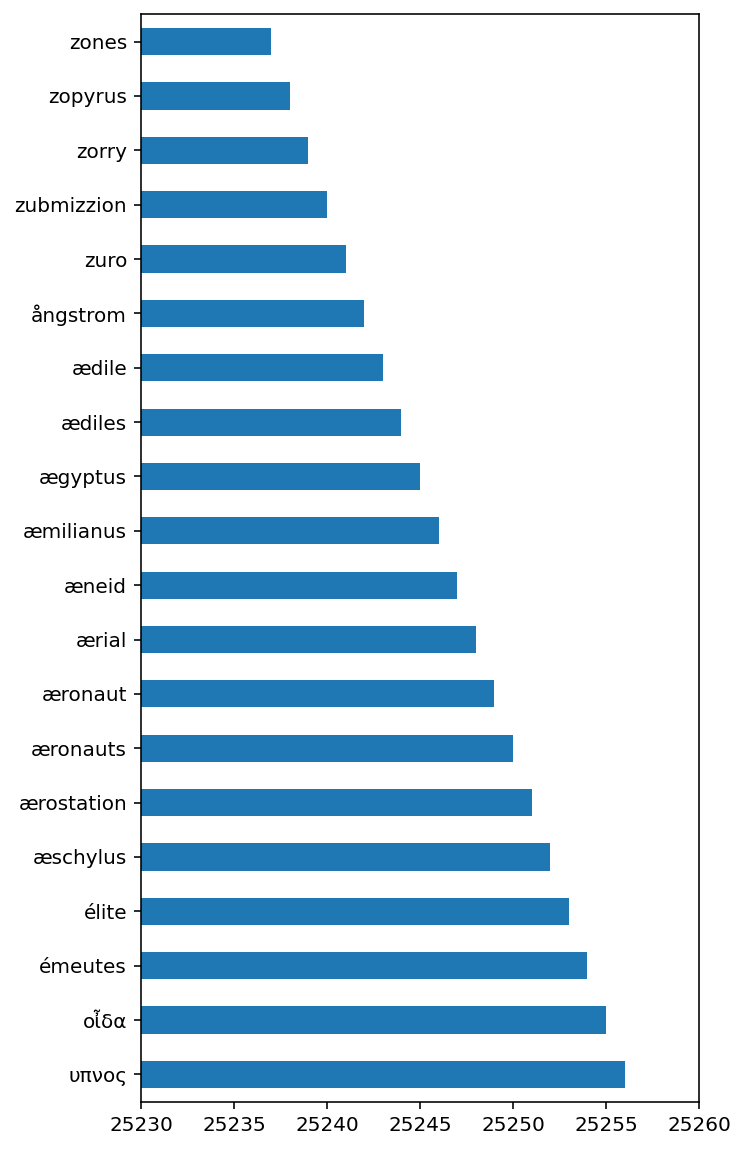

In [ ]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

## **Histogram of text length of each writer**

A function to return the length of text

In [ ]:
def length(text):
  ''' a function which return the length of text'''
  return len(text)

Apply the function to each example

In [ ]:
data['length'] = data['text'].apply(length)
data.head(10)

,id,text,author,length
0,id26305,process howev afford mean ascertain dimens dun...,EAP,136
1,id17569,never occur fumbl might mere mistak,HPL,35
2,id11008,left hand gold snuff box caper hill cut manner...,EAP,113
3,id27763,love spring look windsor terrac sixteen fertil...,MWS,137
4,id12958,find noth els even gold superintend abandon at...,HPL,102
5,id22965,youth pass solitud best year spent gentl femin...,MWS,265
6,id09674,astronom perhap point took refug suggest non l...,EAP,75
7,id13515,surcingl hung riband bodi,EAP,25
8,id19322,knew could say stereotomi without brought thin...,EAP,267
9,id00912,confess neither structur languag code govern p...,MWS,80


**Extracting data of each class**

### **Code Explanation**

| **Code** | **Explanation** |
|----------|---------------|
| `EAP_data =` | Creates a new DataFrame named `EAP_data`. |
| `data[data['author'] == 'EAP']` | Filters the `data` DataFrame to select only the rows where the `'author'` column is equal to `'EAP'` (Edgar Allan Poe). |
| `HPL_data =` | Creates a new DataFrame named `HPL_data`. |
| `data[data['author'] == 'HPL']` | Filters the `data` DataFrame to select only the rows where the `'author'` column is equal to `'HPL'` (H.P. Lovecraft). |
| `MWS_data =` | Creates a new DataFrame named `MWS_data`. |
| `data[data['author'] == 'MWS']` | Filters the `data` DataFrame to select only the rows where the `'author'` column is equal to `'MWS'` (Mary Shelley). |

---

### **Summary**
📌 **This code is splitting the dataset (`data`) into three separate DataFrames** based on the `'author'` column:  
- `EAP_data` → Contains only Edgar Allan Poe's texts.  
- `HPL_data` → Contains only H.P. Lovecraft's texts.  
- `MWS_data` → Contains only Mary Shelley's texts.  

✅ This is useful when analyzing each author's writing style separately! 🚀

In [ ]:
EAP_data = data[data['author'] == 'EAP']
HPL_data = data[data['author'] == 'HPL']
MWS_data = data[data['author'] == 'MWS']

# print(EAP_data)
# print(HPL_data)
# print(MWS_data)

**Histogram of text lenght of  each writer**

As we can see the distributions coincides so it better to leave out text length as a feature for predictive modelling

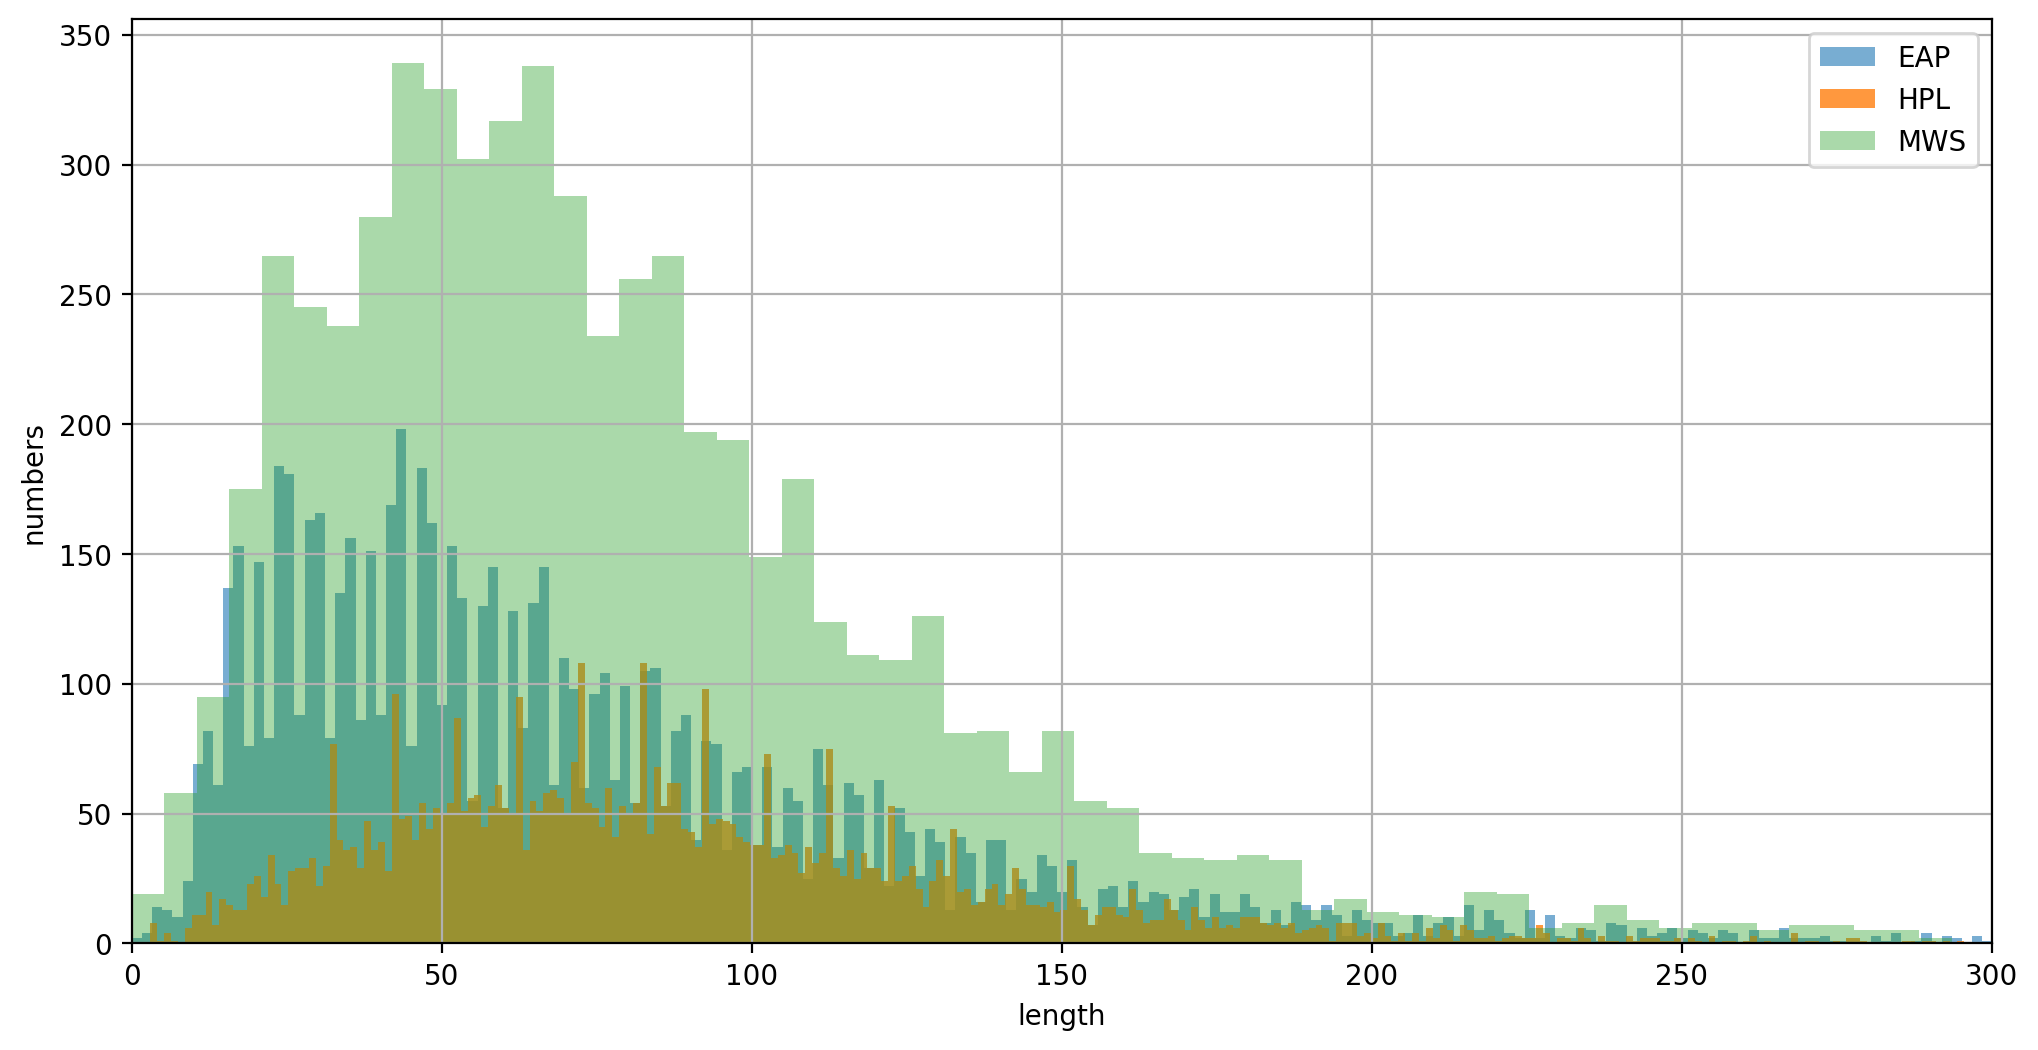

In [ ]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(EAP_data['length'], alpha = 0.6, bins=bins, label='EAP')
plt.hist(HPL_data['length'], alpha = 0.8, bins=bins, label='HPL')
plt.hist(MWS_data['length'], alpha = 0.4, bins=bins, label='MWS')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

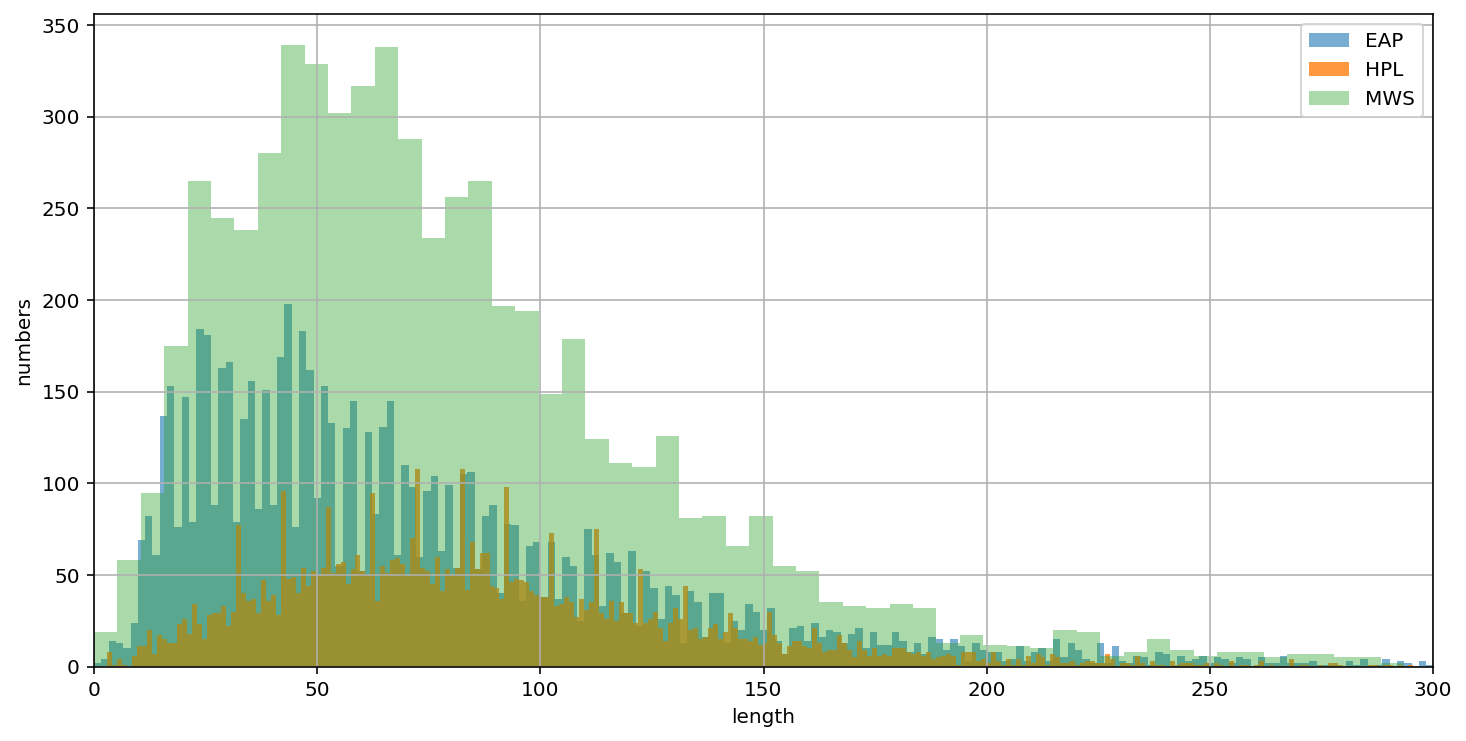

In [ ]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(EAP_data['length'], alpha = 0.6, bins=bins, label='EAP')
plt.hist(HPL_data['length'], alpha = 0.8, bins=bins, label='HPL')
plt.hist(MWS_data['length'], alpha = 0.4, bins=bins, label='MWS')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

# **Top words of each writer and their count**

## **Edgar Allan Poe**

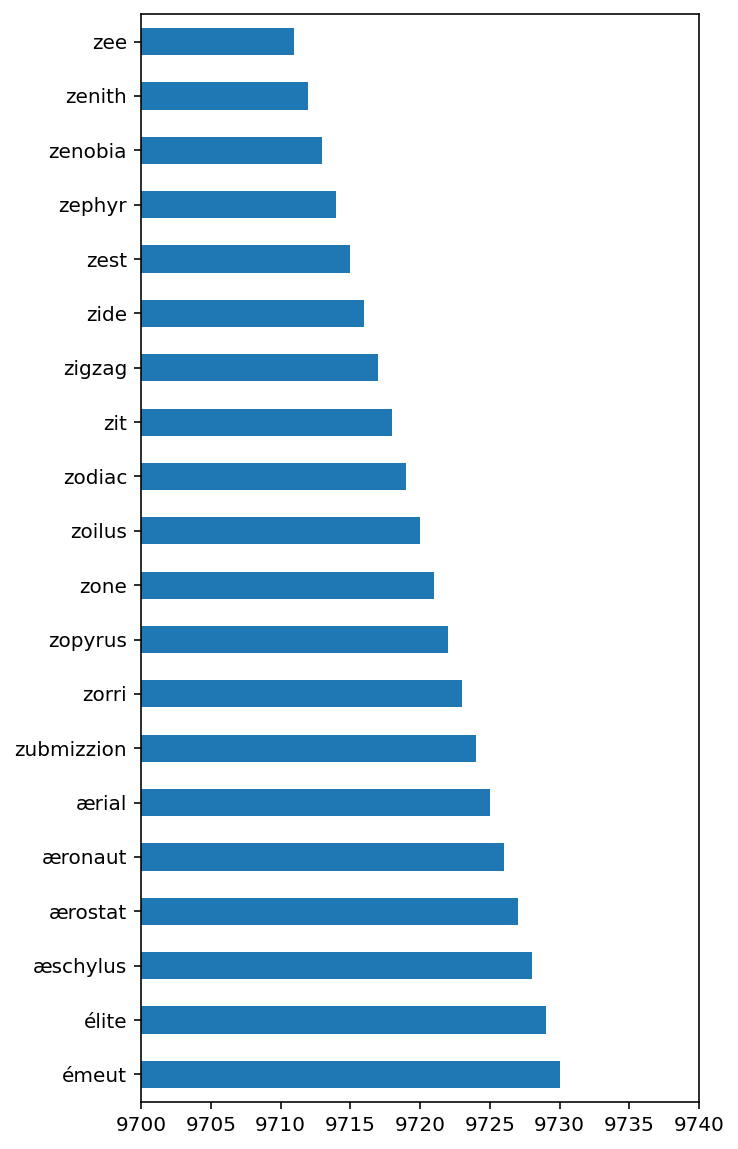

In [ ]:
# create the object of tfid vectorizer
EAP_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
EAP_tfid_vectorizer.fit(EAP_data['text'])
# collect the vocabulary items used in the vectorizer
EAP_dictionary = EAP_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in EAP_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
EAP_vocab = pd.Series(count, index=vocab)
# sort the dataframe
EAP_vocab = EAP_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = EAP_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (9700, 9740))

## **HP Lovecraft**

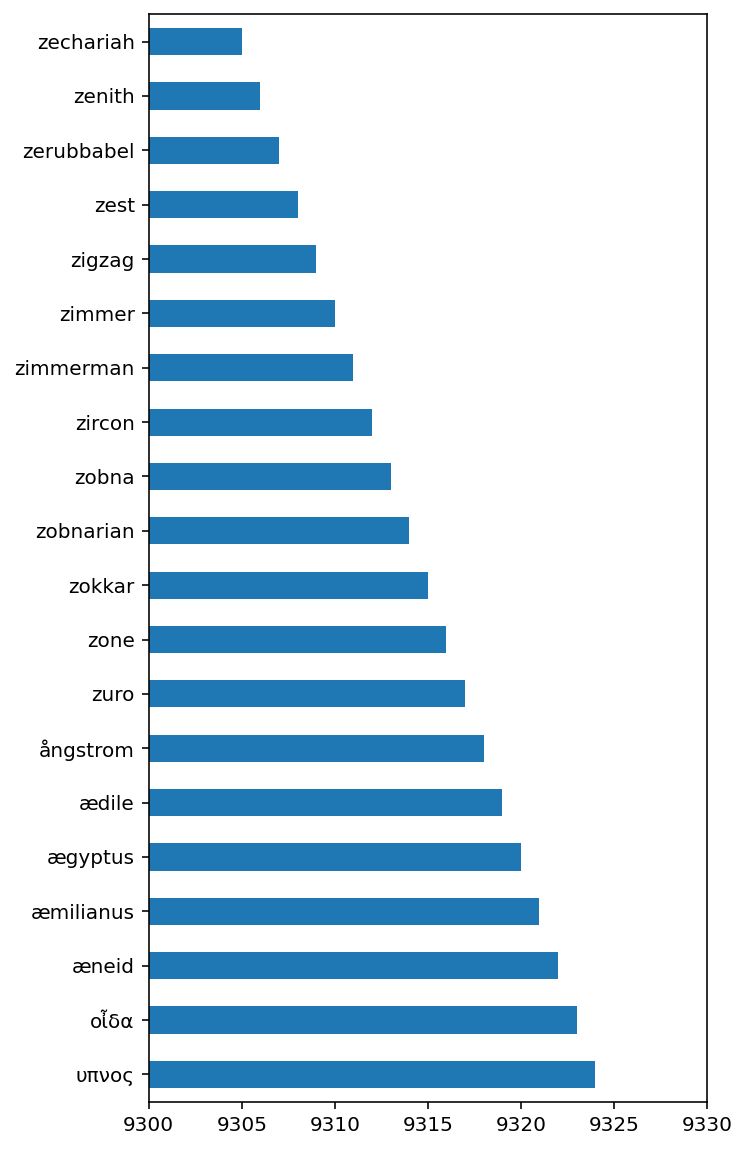

In [ ]:
# create the object of tfid vectorizer
HPL_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
HPL_tfid_vectorizer.fit(HPL_data['text'])
# collect the vocabulary items used in the vectorizer
HPL_dictionary = HPL_tfid_vectorizer.vocabulary_.items()
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in HPL_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
HPL_vocab = pd.Series(count, index=vocab)
# sort the dataframe
HPL_vocab = HPL_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = HPL_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (9300, 9330))

## **Mary Shelley**

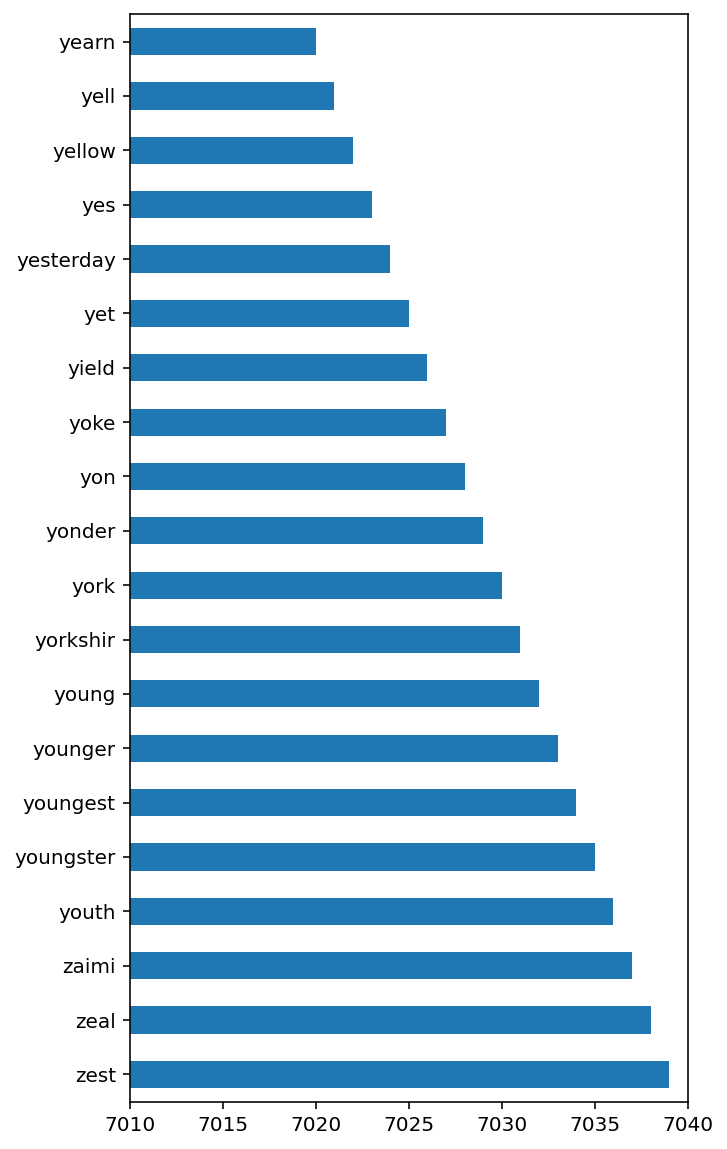

In [ ]:
# create the object of tfid vectorizer
MWS_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
MWS_tfid_vectorizer.fit(MWS_data['text'])
# collect the vocabulary items used in the vectorizer
MWS_dictionary = MWS_tfid_vectorizer.vocabulary_.items()
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated list
for key, value in MWS_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe and vocab as index
MWS_vocab = pd.Series(count, index=vocab)
# sort the dataframe
MWS_vocab = MWS_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = MWS_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (7010, 7040))

**As we can see the top words of each writer are cleary distinct and are in huge numbers. Word Count or TF-IDF of the can provide a good feature**

# **TF-IDF Extraction**

TF-IDF (**Term Frequency - Inverse Document Frequency**) is a **scoring technique** used in **Natural Language Processing (NLP)** to measure how important a word is in a document compared to the entire collection of documents (corpus).  

---

### **1. TF (Term Frequency) – How often a word appears in a document**  
It calculates **how frequently a word appears** in a document. The formula is:  

$TF(t) = \frac{\text{Number of times term } t \text{ appears in a document}}{\text{Total number of words in the document}}$

🔹 **Example:**  
Suppose we have a document with the sentence:  
👉 **"Data Science is amazing"**  

If the word **"Data"** appears **3 times** in a document with **100 total words**, then:  

$TF(Data) = \frac{3}{100} = 0.03$


So, the word "Data" appears **3% of the time** in this document.  

---

### **2. IDF (Inverse Document Frequency) – How rare a word is in the whole dataset**  
IDF measures **how unique or rare a word is** across all documents. A word that appears in **many documents** (like "the", "is") will have **low IDF**, while a rare word (like "neural network") will have **high IDF**, making it more important.  



IDF(t) = $\log_e\left(\frac{\text{Total number of documents}}{\text{Number of documents containing term } t}\right)$


🔹 **Example:**  
If we have **10,000 documents** and the word **"Data"** appears in **500 documents**, then:  

\[
IDF(Data) = $\log_e\left(\frac{10,000}{500}\right) = \log_e(20) \approx 3
$

Higher IDF means the word is **rare and more important**.  

---

### **3. TF-IDF Score Calculation**  
TF-IDF is calculated by multiplying **TF and IDF**:  

\[
TF-IDF(t) = TF(t) \times IDF(t)
\]

🔹 **Example:**  
If **TF(Data) = 0.03** and **IDF(Data) = 3**, then:  

\[
TF-IDF(Data) = 0.03 * 3 = 0.09
\]

A **higher TF-IDF score means the word is important in the document**.  

---

### **Where is TF-IDF Used?**  
✅ **Search Engines** – Google uses TF-IDF to rank search results  
✅ **Spam Detection** – Helps detect spam emails  
✅ **Text Summarization** – Finds important words in text  
✅ **Chatbots & NLP Applications** – Improves chatbot responses  

---

### **In Summary:**  
1️⃣ **TF measures how often a word appears in a document**  
2️⃣ **IDF measures how rare the word is in all documents**  
3️⃣ **TF-IDF gives a final score to identify important words**  


In [ ]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(data['text'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [ ]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,15102,15103,15104,15105,15106,15107,15108,15109,15110,15111,15112,15113,15114,15115,15116,15117,15118,15119,15120,15121,15122,15123,15124,15125,15126,15127,15128,15129,15130,15131,15132,15133,15134,15135,15136,15137,15138,15139,15140,15141
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.266318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Sentence

The codex contains a complete text of the four Gospels on 305 parchment leaves (19.5 cm by 15.2 cm) with only one lacuna. The text is written in one column per page, in 21 lines per page